In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
from scipy.io import loadmat,savemat
from sklearn import svm
from sklearn.metrics import cohen_kappa_score,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
img_fname = 'Indian_pines.mat'
gt_fname = 'Indian_pines_gt.mat'

dataset = loadmat(img_fname)['indian_pines']
gt_matrix = loadmat(gt_fname)['indian_pines_gt']

# print(dataset[0,:,:])
print(dataset.shape)


(145, 145, 220)


In [ ]:
# Assuming your array is named 'data_array'
# Create an array of indices for the desired bands
bands_indices = np.concatenate([np.arange(4, 103), np.arange(113, 148), np.arange(166, 217)])

# Select the desired bands using the indices
dataset = dataset[:,:, bands_indices]

dataset = dataset.reshape((-1,len(bands_indices)))
gt_matrix = gt_matrix.reshape(-1)

# for i in range(len(dataset)):
#     x = dataset['X'][i]
#     y = dataset['Y'][i]
#     if gt_matrix[x-1, y-1] == 0:
#         dataset.drop(i, inplace=True)
#     else dataset.

# savemat('Indian_pines_optimized.mat', {'table': dataset.to_dict()})

In [ ]:
def equal_width_binning(data, num_bins):
    num_attributes = data.shape[1]  # Assuming each column is an attribute

    # Initialize an array to store binned data
    binned_data = np.zeros_like(data, dtype=int)
    # binned_data = np.zeros((data.shape[0], data.shape[1], 2), dtype=int)
    # print(binned_data.shape)

    for attribute_index in range(num_attributes):
        attribute_values = data[:, attribute_index]
        min_value, max_value = np.min(attribute_values), np.max(attribute_values)

        # Calculate bin width
        bin_width = (max_value - min_value) / num_bins

        # Perform binning for each object in the dataset
        for object_index in range(data.shape[0]): # runs for each object for
            value = attribute_values[object_index]

            # Calculate the bin index for the value
            bin_index = int((value - min_value) / bin_width)

            # Assign the bin index to the corresponding position in the binned_data array
            binned_data[object_index, attribute_index] = bin_index
            # binned_data[object_index, attribute_index, 0] = bin_index
            # binned_data[object_index, attribute_index, 1] = value

    return binned_data


In [ ]:
dataset = MinMaxScaler().fit_transform(dataset)

binned_data = equal_width_binning(dataset, 40)
#binned_data = binned_data[:, :20]

print(binned_data)
print(binned_data.shape)

[[11 10 11 ... 13 12 15]
 [12 12 12 ... 16 14 16]
 [14 12 13 ... 14 15 16]
 ...
 [ 5  3  3 ...  3  4  3]
 [ 3  2  3 ...  4  2  4]
 [ 3  2  3 ...  2  2  4]]
(21025, 185)


In [ ]:
imp_indices = np.where(gt_matrix > 0)[0]
dataset=dataset[imp_indices]
gt_matrix=gt_matrix[imp_indices]

In [ ]:
print(dataset.shape)

(10249, 185)


In [ ]:

plt.plot(range(0,185), dataset[5], marker='o', label='PCA')

# Adding labels and title
plt.xlabel('Band Value')
plt.ylabel('Intensity')
# plt.title('Accuracy Comparison: PCA vs Rough Set Selection')
# plt.xticks(band_sizes)  # Set x-axis ticks to the specified bands

# Adding legend
plt.legend()


# Displaying the plot
plt.grid(True)
plt.show()

# Band Selection Algorithm


In [ ]:
# Dictionary to store indiscernibility sets for each band
# indiscernibility_sets = defaultdict(list)
ind_sets = defaultdict(list)
matrix = binned_data

# Iterate through each band (column)
for band_idx in range(matrix.shape[1]):
    band = matrix[:, band_idx]
    unique_classes = np.unique(band)

    # Create indiscernibility sets for each class
    for class_label in unique_classes:
        subset = np.where(band == class_label)[0]
        # indiscernibility_sets[(band_idx, class_label)].append(subset)
        ind_sets[band_idx].append(list(subset))


# Print the first indiscernibility set for each band
# for key, value in indiscernibility_sets.items():
#     print(f"Band: {key[0]}, Class: {key[1]}, Indiscernibility Set: {value[0]}")
# for key, value in ind_sets.items():
#     print(f"Band: {key}, Indiscernibility Set: {value}")

In [ ]:
# Dictionary to store indiscernibility sets for each band
ind_sets = defaultdict(list)
matrix = binned_data

# Iterate through each band (column)
for band_idx in range(matrix.shape[1]):
    band = matrix[:, band_idx]
    unique_classes = np.unique(band)

    # Create indiscernibility sets for each class
    for class_label in unique_classes:
        subset = np.where(band == class_label)[0]
        ind_sets[band_idx].append(list(subset))

In [ ]:
gt_sets = defaultdict(list)
gt_set = []
unique_classes = np.unique(gt_matrix)
# !!!!!!!!!!!!!!!unique_classes=np.delete(unique_classes, 0)

for class_label in unique_classes:
    subset = np.where(gt_matrix==class_label)[0]
    gt_sets[class_label].extend(subset)  # Append each item individually
    gt_set.append(subset.tolist())

for key, value in gt_sets.items():
    print(f"Class: {key}, Pixels: {value}")

print(f"\n\nPixels: {gt_set}")

Class: 1, Pixels: [5520, 5602, 5603, 5682, 5683, 5684, 5764, 5765, 5766, 5767, 5849, 5850, 5851, 5852, 5853, 5933, 5934, 5935, 5936, 5937, 5938, 6016, 6017, 6018, 6019, 6020, 6021, 6057, 6058, 6059, 6060, 6061, 6062, 6080, 6081, 6082, 6083, 6084, 6085, 6086, 6166, 6167, 6168, 6169, 6251, 6252]
Class: 2, Pixels: [1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 17

In [ ]:
def pos(tuple1, tuple2):
    result = []

    for subtuple1 in tuple1:
        found = False

        for subtuple2 in tuple2:
            if all(item in subtuple2 for item in subtuple1):
                found = True
                break

        if found:
            result.extend(subtuple1)

    return len(result)

# Example usage:
# tuple1 = ((1, 2), (3, 4), (5, 6)) # Indiscrinibility set over C
# tuple2 = ((1, 2, 3), (3, 4, 5), (7, 8, 9)) # Decision Indiscrinibility Set

# result = pos(tuple1, tuple2)
# print(result)

In [ ]:
t2 = gt_set

gamma = [];
n = len(ind_sets)
gamma2 = np.zeros((n, n))-1
# # Selecting most informative band by finding POS(C, D) with maximum value
tmax = [0, 0]
u  = 21025
for key, value in ind_sets.items():
      gamma.append(pos(value, t2)/u)
      gamma2[key, key] = gamma[key]
      if(gamma[key]>=tmax[1]) :
        tmax[1] = gamma[key]
        tmax[0] = key
print(tmax)


[9, 0.00023781212841854935]


In [ ]:
def ind_intersection(b1,b2):
  intersection = []
  for subset_band_0 in b1:
      for subset_band_1 in b2:
          intersection_subset = list(set(subset_band_0).intersection(subset_band_1))
          if intersection_subset:
            intersection.append(intersection_subset)
  return intersection

# ind_sets_band_0 = [[0, 1], [2, 5], [3, 4], [6]]
# ind_sets_band_1 = [[1, 3], [2, 5], [6], [4], [0]]
# print(ind_intersection(ind_sets[0], ind_sets[1]))

In [ ]:
# n = len(ind_sets)
# print(n)
# u=220

# for i in range(n):
#     print(f"{i} th iteration")
#     for j in range(i + 1, n):
#         temp = pos(ind_intersection(ind_sets[i], ind_sets[j]), t2)/u
#         gamma2[i, j] = temp
#         gamma2[j, i] = temp

# print(gamma2)

In [ ]:
def calculate_gamma(gamma, j, ind_sets, s):
  u=21025
  min_gamma = (-1, 999999)
  max_gamma = (-1, -1)
  for i in s:
    if(gamma[i, j] < 0):
      temp = pos(ind_intersection(ind_sets[i], ind_sets[j]), gt_set)/u
      gamma[i, j] = temp
      gamma[j, i] = temp
    if(gamma[i, j] < min_gamma[1]):
      min_gamma = (i, gamma[i, j])
    if(gamma[i, j] > max_gamma[1]):
      max_gamma = (i, gamma[i, j])

  return gamma, min_gamma, max_gamma

In [ ]:
# intersection of indiscernability considering bi...bj


# relevance of all remaining bands


In [ ]:
def choose_bands(n_bands, gamma):
  s = set()
  p = []
  if(n_bands <=0 or n_bands > len(gamma[0])):
    return s

  s.add(tmax[0])
  print(tmax[0])
  p.append(tmax[0])

  while(len(s)!=n_bands):
    f = np.ones(len(gamma[0])) * -1
    for i in range(len(gamma[0])):
      if i not in s:
        gamma, min_gamma, max_gamma = calculate_gamma(gamma, i, ind_sets, s)
        f[i] = gamma[i, i] + min_gamma[1]**2/max_gamma[1]

    band_number = int(np.argmax(f))
    s.add(band_number)
    print(band_number)
    p.append(band_number)


  print(p)
  return s

In [ ]:
bands_chosen = choose_bands(10, gamma2)
print(bands_chosen)

# Comparing PCA with obtained Bands

In [ ]:
from sklearn import svm
from sklearn.metrics import cohen_kappa_score,classification_report, accuracy_score, f1_score, confusion_matrix, log_loss, roc_curve, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA



# !!!!!!!!!!!!!!!!roughset_bands = [47, 23, 115, 146, 31, 98, 57, 8, 78, 69, 36, 29, 101, 2, 50, 0, 32, 14, 44, 74, 184, 41, 134, 26, 48, 55, 53, 39, 1, 46]

chosen_60_bands = [9, 98, 103, 32, 68, 26, 0, 170, 95, 29, 18, 30, 43, 13, 31, 33, 183, 2, 5, 65, 142, 11, 3, 28, 7, 162, 24, 12, 182, 59, 146, 73, 74, 116, 70, 37, 79, 71, 134, 4, 45, 72, 14, 16, 63, 139, 92, 54, 8, 19, 149, 23, 27, 50, 132, 25, 56, 147, 62, 15]
target = gt_matrix

In [ ]:
len(chosen_60_bands)

60

In [ ]:
band_sizes = range(10, 61, 10)
accuracy_rs=[]
accuracy_pca=[]
ks_rs=[]
ks_pca=[]
log_loss_rs=[]
log_loss_pca=[]
f1_score_rs=[]
f1_score_pca=[]
roc_auc_score_rs=[]
roc_auc_score_pca=[]

In [ ]:
encoder = OneHotEncoder(sparse_output=False, categories='auto')

for size in band_sizes:
  # rough set calculation
  selected_bands = chosen_60_bands[:size]
  selected_data = dataset[:, selected_bands]
  X_train, X_test, y_train, y_test = train_test_split(selected_data, target, test_size = 0.2, random_state = 100)
  clf = svm.SVC(C=350,kernel='rbf',gamma=1)
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  accuracy_rs.append(accuracy_score(y_test, pred))
  ks_rs.append(cohen_kappa_score(y_test,pred))
  pred_array = np.array(pred).reshape(-1,1)
  pred_onehot = encoder.fit_transform(pred_array)
  log_loss_rs.append(log_loss(y_test, pred_onehot))
  f1_score_rs.append(f1_score(y_test, pred, average='micro'))
  roc_auc_score_rs.append(roc_auc_score(y_test, pred_onehot, multi_class='ovr'))

  # pca calculation
  model =PCA(n_components=size)
  selected_data = model.fit_transform(dataset)
  X_train, X_test, y_train, y_test = train_test_split(selected_data, target, test_size = 0.2, random_state = 100)
  clf2 = svm.SVC(C=300,kernel='rbf',gamma=0.75)
  clf2.fit(X_train, y_train)
  pred = clf2.predict(X_test)
  accuracy_pca.append(accuracy_score(y_test, pred))
  ks_pca.append(cohen_kappa_score(y_test,pred))
  pred_array = np.array(pred).reshape(-1,1)
  pred_onehot = encoder.fit_transform(pred_array)
  log_loss_pca.append(log_loss(y_test, pred_onehot))
  f1_score_pca.append(f1_score(y_test, pred, average='micro'))
  roc_auc_score_pca.append(roc_auc_score(y_test, pred_onehot, multi_class='ovr'))

In [ ]:
print(accuracy_pca)
print(accuracy_rs)

[0.871219512195122, 0.9146341463414634, 0.9243902439024391, 0.9287804878048781, 0.926829268292683, 0.9287804878048781]
[0.8307317073170731, 0.8751219512195122, 0.8878048780487805, 0.9073170731707317, 0.9102439024390244, 0.9146341463414634]


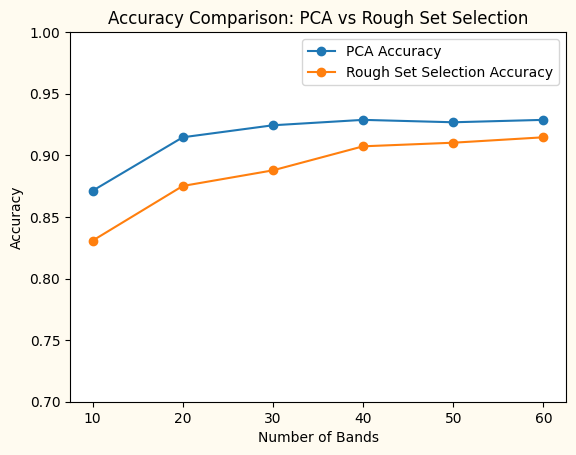

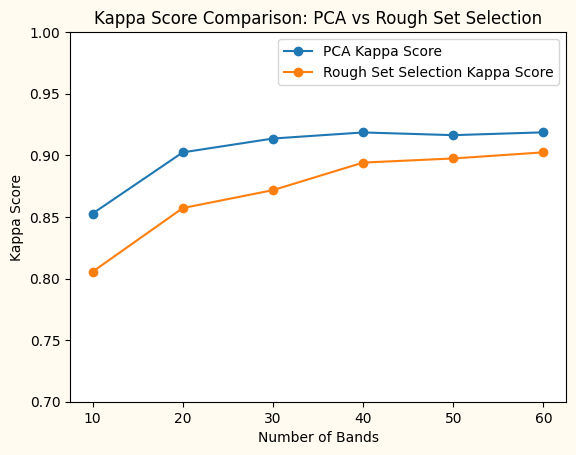

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(facecolor='#FFFBF0')
plt.plot(band_sizes, accuracy_pca, marker='o', label='PCA Accuracy')
plt.plot(band_sizes, accuracy_rs, marker='o', label='Rough Set Selection Accuracy')
# plt.plot(band_sizes, ks_pca, marker='o', label='PCA Kappa Score')
# plt.plot(band_sizes, ks_rs, marker='o', label='Rough Set Selection Kappa Score')

# Adding labels and title
plt.xlabel('Number of Bands')

plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: PCA vs Rough Set Selection')
plt.xticks(band_sizes)  # Set x-axis ticks to the specified bands

# Adding legend
plt.legend()

plt.ylim(0.7, 1)

# Displaying the plot
# plt.grid(True)
plt.show()

# plt.plot(band_sizes, accuracy_pca, marker='o', label='PCA Accuracy')
# plt.plot(band_sizes, accuracy_rs, marker='o', label='Rough Set Selection Accuracy')
plt.figure(facecolor='#FFFBF0')
plt.plot(band_sizes, ks_pca, marker='o', label='PCA Kappa Score')
plt.plot(band_sizes, ks_rs, marker='o', label='Rough Set Selection Kappa Score')

# Adding labels and title

plt.xlabel('Number of Bands')
plt.ylabel('Kappa Score')
plt.title('Kappa Score Comparison: PCA vs Rough Set Selection')
plt.xticks(band_sizes)  # Set x-axis ticks to the specified bands

# Adding legend
plt.legend()

plt.ylim(0.7, 1)

# Displaying the plot
# plt.grid(True)
plt.show()

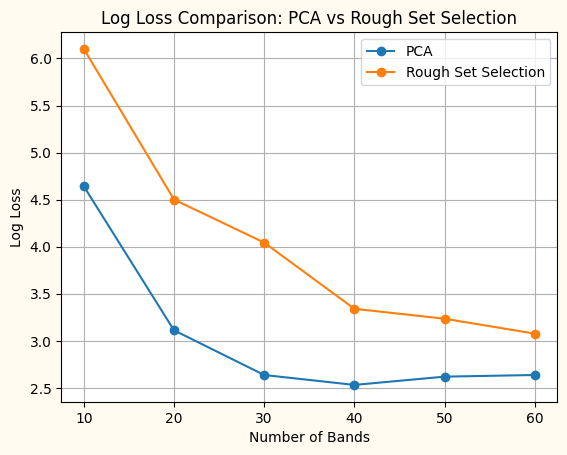

In [ ]:
plt.figure(facecolor='#FFFBF0')
plt.plot(band_sizes, log_loss_pca, marker='o', label='PCA')
plt.plot(band_sizes, log_loss_rs, marker='o', label='Rough Set Selection')

# Adding labels and title
plt.xlabel('Number of Bands')
plt.ylabel('Log Loss')
plt.title('Log Loss Comparison: PCA vs Rough Set Selection')
plt.xticks(band_sizes)  # Set x-axis ticks to the specified bands

# Adding legend
plt.legend()


# Displaying the plot
plt.grid(True)
plt.show()

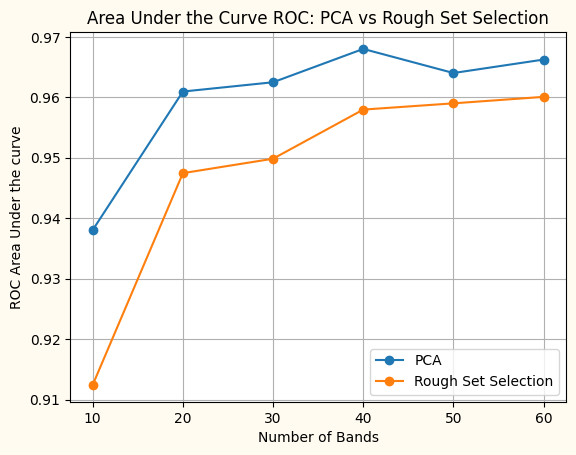

In [ ]:
plt.figure(facecolor='#FFFBF0')
plt.plot(band_sizes, roc_auc_score_pca, marker='o', label='PCA')
plt.plot(band_sizes, roc_auc_score_rs, marker='o', label='Rough Set Selection')

# Adding labels and title
plt.xlabel('Number of Bands')
plt.ylabel('ROC Area Under the curve')
plt.title('Area Under the Curve ROC: PCA vs Rough Set Selection')
plt.xticks(band_sizes)  # Set x-axis ticks to the specified bands

# Adding legend
plt.legend()


# Displaying the plot
plt.grid(True)
plt.show()

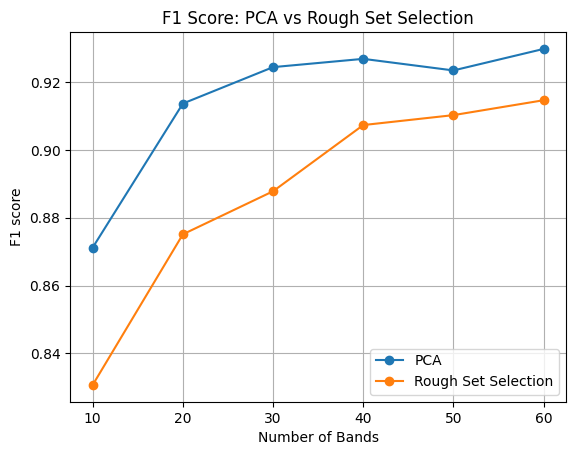

In [ ]:
plt.plot(band_sizes, f1_score_pca, marker='o', label='PCA')
plt.plot(band_sizes, f1_score_rs, marker='o', label='Rough Set Selection')

# Adding labels and title
plt.xlabel('Number of Bands')
plt.ylabel('F1 score')
plt.title('F1 Score: PCA vs Rough Set Selection')
plt.xticks(band_sizes)  # Set x-axis ticks to the specified bands

# Adding legend
plt.legend()


# Displaying the plot
plt.grid(True)
plt.show()

In [ ]:
bin_size = [40, 45, 50, 55, 60]

# accuracy_pca_bins = [0.9243902439024391, 0.9258536585365854, 0.9248780487804878, 0.9239024390243903]
accuracy_rs_bins = [0.8619512195121951, 0.8897560975609756, 0.8902439024390244, 0.8917073170731707,0.9019512195121951]

### Confusion Matrix and ROC Curve

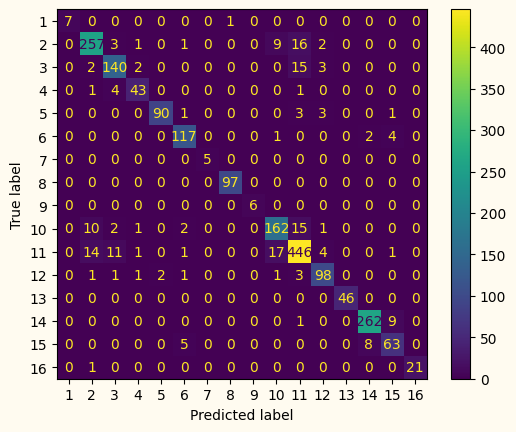

In [ ]:
# rough set calculation
selected_bands = chosen_60_bands[:40]
selected_data = dataset[:, selected_bands]
X_train, X_test, y_train, y_test = train_test_split(selected_data, target, test_size = 0.2, random_state = 100)
clf = svm.SVC(C=350,kernel='rbf',gamma=1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

cm = confusion_matrix(y_test, pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
# print(dir(disp))

# disp.figure_.set(
#     facecolor='#FFFBF0',
# )
# plt.figure(facecolor='#FFFBF0')
disp.plot().figure_.set(
    facecolor='#FFFBF0',
)

plt.show()
# pred_array = np.array(pred).reshape(-1,1)
# pred_onehot = encoder.fit_transform(pred_array)
# tpr, fpr, threshold = roc_curve(y_test, pred)
# plt.plot([0, 1], [1, 0], '--')
# plt.plot(tpr, fpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC for Rough Set')
# plt.show()

# pca calculation
# model =PCA(n_components=40)
# selected_data = model.fit_transform(dataset)
# X_train, X_test, y_train, y_test = train_test_split(selected_data, target, test_size = 0.2, random_state = 100)
# clf2 = svm.SVC(C=300,kernel='rbf',gamma=0.75)
# clf.fit(X_train, y_train)
# pred = clf.predict(X_test)

# # pred_array = np.array(pred).reshape(-1,1)
# # pred_onehot = encoder.fit_transform(pred_array)
# # tpr, fpr, threshold = roc_curve(y_test, pred)
# # plt.plot([0, 1], [1, 0], '--')
# # plt.plot(tpr, fpr)
# # plt.xlabel('False Positive Rate')
# # plt.ylabel('True Positive Rate')
# # plt.title('ROC for Rough Set')
# # plt.show()


# cm = confusion_matrix(y_test, pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
# disp.plot()
# plt.show()

In [ ]:
print(dir(disp.confusion_matrix))


['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '

<Figure size 640x480 with 0 Axes>

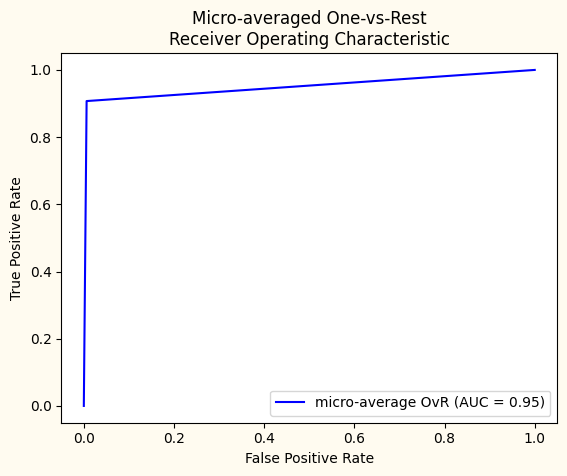

In [ ]:
from sklearn.preprocessing import LabelBinarizer

encoder = OneHotEncoder(sparse_output=False, categories='auto')
label_binarizer = LabelBinarizer().fit(y_train)

# rough set calculation
selected_bands = chosen_60_bands[:40]
selected_data = dataset[:, selected_bands]
X_train, X_test, y_train, y_test = train_test_split(selected_data, target, test_size = 0.2, random_state = 100)
clf = svm.SVC(C=350,kernel='rbf',gamma=1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
y_onehot_test = label_binarizer.transform(y_test)
pred_array = np.array(pred).reshape(-1,1)
pred_onehot = encoder.fit_transform(pred_array)

plt.figure(facecolor='#FFFBF0')

display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    pred_onehot.ravel(),
    name="micro-average OvR",
    color="blue",

)

display.figure_.set(
    facecolor='#FFFBF0',
)

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

# display.plot()

# # plt.gca().set_facecolor('#E0FFFF')
# plt.show()




# # pca calculation
# model =PCA(n_components=40)
# selected_data = model.fit_transform(dataset)
# X_train, X_test, y_train, y_test = train_test_split(selected_data, target, test_size = 0.2, random_state = 100)
# clf2 = svm.SVC(C=300,kernel='rbf',gamma=0.75)
# clf.fit(X_train, y_train)
# pred = clf.predict(X_test)
# y_onehot_test = label_binarizer.transform(y_test)

# display = RocCurveDisplay.from_predictions(
#     y_onehot_test.ravel(),
#     pred.ravel(),
#     name="micro-average OvR",
#     color="darkorange",
#     plot_chance_level=True,
# )
# _ = display.ax_.set(
#     xlabel="False Positive Rate",
#     ylabel="True Positive Rate",
#     title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
# )



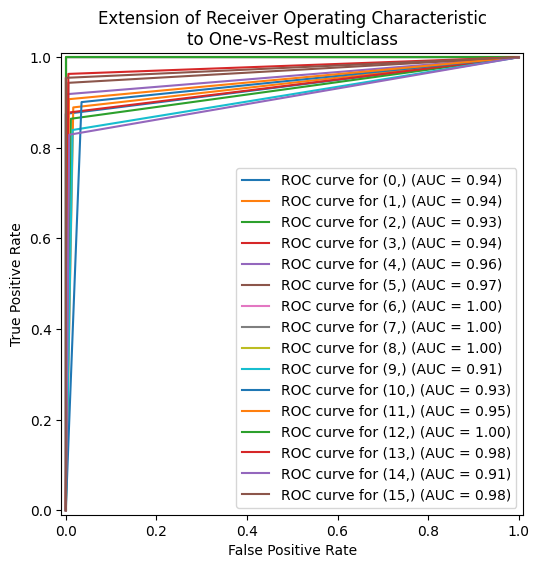

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

encoder = OneHotEncoder(sparse_output=False, categories='auto')
label_binarizer = LabelBinarizer().fit(y_train)

# rough set calculation
selected_bands = chosen_60_bands[:40]
selected_data = dataset[:, selected_bands]
X_train, X_test, y_train, y_test = train_test_split(selected_data, target, test_size = 0.2, random_state = 100)
clf = svm.SVC(C=350,kernel='rbf',gamma=1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
y_onehot_test = label_binarizer.transform(y_test)
pred_array = np.array(pred).reshape(-1,1)
pred_onehot = encoder.fit_transform(pred_array)

# colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id in zip(range(0, 16)):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        pred_onehot[:, class_id],
        name=f"ROC curve for {class_id}",
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 17.8 MB/s eta 0:00:00


# Relief F Algorithm

In [ ]:
!pip install ReliefF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ReliefF: filename=ReliefF-0.1.2-py3-none-any.whl size=6303 sha256=f9abf01794fd7d0ad9e5d9451c73162d0f4aae4349b051361e4360df24df561e
  Stored in directory: /root/.cache/pip/wheels/35/bc/0b/14a0227d4829b6b27f25de250213eb348b094d075be7604707
Successfully built ReliefF


In [ ]:
from sklearn import svm
from sklearn.metrics import cohen_kappa_score,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from ReliefF import ReliefF

In [ ]:
first_60 = [9, 98, 103, 32, 68, 26, 0, 170, 95, 29, 18, 30, 43, 13, 31, 33, 183, 2, 5, 65, 142, 11, 3, 28, 7, 162, 24, 12, 182, 59, 146, 73, 74, 116, 70, 37, 79, 71, 134, 4, 45, 72, 14, 16, 63, 139, 92, 54, 8, 19, 149, 23, 27, 50, 132, 25, 56, 147, 62, 15]
# print(len(first_60))

# dataset, target
bands_60 = dataset[:, first_60]
target = gt_matrix

fs = ReliefF(n_neighbors=90, n_features_to_keep=5)
X_train = fs.fit_transform(selected_data, gt_matrix)
print(bands_60.shape, target.shape)


In [ ]:
print(X_train)

[[0.47186701 0.38779528 0.30434783 0.34123223 0.57627119]
 [0.51023018 0.42125984 0.36758893 0.42180095 0.75423729]
 [0.53324808 0.43897638 0.39525692 0.35545024 0.54237288]
 ...
 [0.43350384 0.34251969 0.29644269 0.33649289 0.55084746]
 [0.45268542 0.35826772 0.30039526 0.36018957 0.51694915]
 [0.47314578 0.36023622 0.34782609 0.30331754 0.72881356]]


In [ ]:
accuracy_rate=[]
kappa_score=[]

for i in [1, 2, 7, 10, 50, 500, 1000]:
  fs = ReliefF(n_neighbors=i, n_features_to_keep=30)
  selected_data = fs.fit_transform(bands_60, gt_matrix)
  # knn = KNeighborsClassifier(n_neighbors=11)
  # score = cross_val_score(knn, x_pca, target, cv=10)
  # accuracy_rate.append(score.mean())

  X_train, X_test, y_train, y_test = train_test_split(selected_data, target, test_size = 0.2, random_state = 100)
  clf2 = svm.SVC(C=175,kernel='rbf',gamma=0.75)
  clf2.fit(X_train, y_train)
  pred = clf2.predict(X_test)
  accuracy_rate.append(accuracy_score(y_test, pred))
  kappa_score.append(cohen_kappa_score(y_test, pred))

[0.8629268292682927, 0.8629268292682927, 0.8629268292682927, 0.8629268292682927, 0.8595121951219512, 0.8639024390243902, 0.871219512195122]
[0.8428656418722352, 0.8428656418722352, 0.8427548917136564, 0.842910206705134, 0.8388614623431465, 0.8438620548075718, 0.8523905932550793]


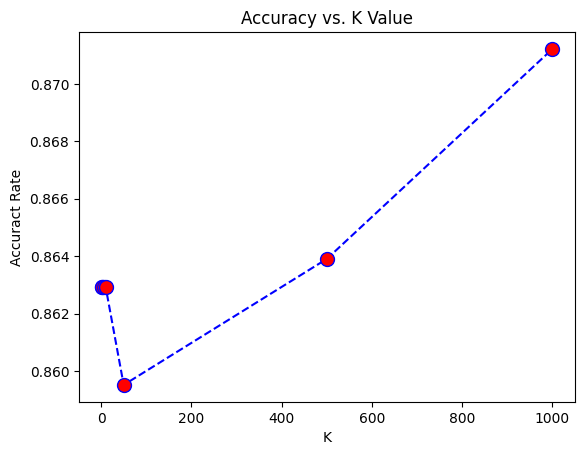

In [ ]:
plt.plot([1, 2, 7, 10, 50, 500, 1000],accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuract Rate')
print(accuracy_rate)
print(kappa_score)

# Enhancing with ReliefF Algorithm

In [ ]:
!pip install ReliefF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ReliefF: filename=ReliefF-0.1.2-py3-none-any.whl size=6303 sha256=d103ac5864446356bebe6feac35d312c3823a873981dfb7b3289b3b36699aab7
  Stored in directory: /root/.cache/pip/wheels/35/bc/0b/14a0227d4829b6b27f25de250213eb348b094d075be7604707
Successfully built ReliefF


In [ ]:
from ReliefF import ReliefF

chosen_60_bands = [9, 98, 103, 32, 68, 26, 0, 170, 95, 29, 18, 30, 43, 13, 31, 33, 183, 2, 5, 65, 142, 11, 3, 28, 7, 162, 24, 12, 182, 59, 146, 73, 74, 116, 70, 37, 79, 71, 134, 4, 45, 72, 14, 16, 63, 139, 92, 54, 8, 19, 149, 23, 27, 50, 132, 25, 56, 147, 62, 15]
reliefF_enchanced_accuracy_rs = []
reliefF_enchanced_kappa_rs = []
reliefF_enchanced_accuracy_relief = []
reliefF_enchanced_kappa_relief = []

target = gt_matrix

In [ ]:
for i in range(10, 61, 10):
  # Apply SVM directly
  selected_data = dataset[:, chosen_60_bands[:i]]
  X_train, X_test, y_train, y_test = train_test_split(selected_data, target, test_size = 0.2, random_state = 100)
  clf1 = svm.SVC(C=175,kernel='rbf',gamma=0.75)
  clf1.fit(X_train, y_train)
  pred = clf1.predict(X_test)
  reliefF_enchanced_accuracy_rs.append(accuracy_score(y_test, pred))
  reliefF_enchanced_kappa_rs.append(cohen_kappa_score(y_test, pred))

  # Apply SVM on Bands selected by ReliefF
  fs = ReliefF(n_neighbors=850, n_features_to_keep=i)
  selected_data = fs.fit_transform(dataset[:, chosen_60_bands], gt_matrix)
  X_train, X_test, y_train, y_test = train_test_split(selected_data, target, test_size = 0.2, random_state = 100)
  clf2 = svm.SVC(C=175,kernel='rbf',gamma=0.75)
  clf2.fit(X_train, y_train)
  pred = clf2.predict(X_test)
  reliefF_enchanced_accuracy_relief.append(accuracy_score(y_test, pred))
  reliefF_enchanced_kappa_relief.append(cohen_kappa_score(y_test, pred))

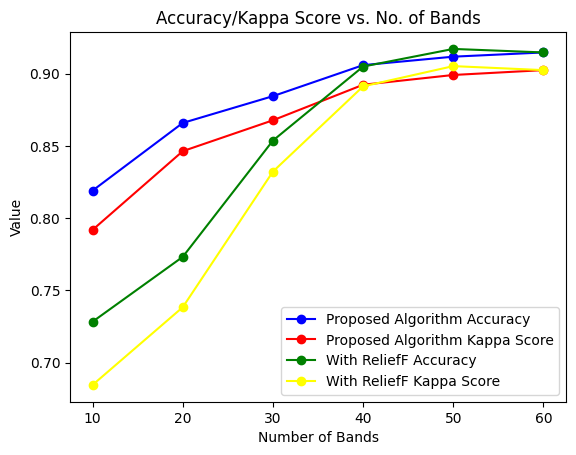

In [ ]:
plt.plot(range(10, 61, 10), reliefF_enchanced_accuracy_rs, color='blue', marker='o', label="Proposed Algorithm Accuracy")
plt.plot(range(10, 61, 10), reliefF_enchanced_kappa_rs, color='red', marker='o', label="Proposed Algorithm Kappa Score")
plt.plot(range(10, 61, 10), reliefF_enchanced_accuracy_relief, color='green', marker='o', label="With ReliefF Accuracy")
plt.plot(range(10, 61, 10), reliefF_enchanced_kappa_relief, color='yellow', marker='o', label="With ReliefF Kappa Score")
plt.title('Accuracy/Kappa Score vs. No. of Bands')
plt.xlabel('Number of Bands')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
print(reliefF_enchanced_accuracy_rs)

[0.8190243902439024, 0.8190243902439024, 0.8658536585365854, 0.884390243902439, 0.9058536585365854, 0.9117073170731708, 0.9146341463414634]
